In [2]:
import pandas as pd

# LAB 06

### Read u.data

In [1]:
path_data = '/Users/antonina.goryacheva/Desktop/NewProLab/lab06/udata.csv'

In [3]:
data = pd.read_csv(path_data, sep='\t', header=None)
data = data.rename(columns={0: 'user_id', 1: 'item_id', 2: 'rating', 3: 'timestamp'})

In [4]:
data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### Read u.item

In [5]:
path_item = '/Users/antonina.goryacheva/Desktop/NewProLab/lab06/uitem.csv'

In [6]:
item = pd.read_csv(path_item, sep='|', header=None, encoding="ISO-8859-1")

In [7]:
item = item.rename(columns={0: 'movie_id', 1: 'release_date', 2: 'video_release_date', 3: 'to_del', 4: 'IMDb_url',
                            5: 'unknown', 6: 'Action', 7: 'Adventure', 8: 'Animation', 9: 'Childrens',
                            10: 'Comedy', 11: 'Crime', 12: 'Documentary', 13: 'Drama', 14: 'Fantasy',
                            15: 'Film_Noir', 16: 'Horror', 17: 'Musical', 18: 'Mystery', 19: 'Romance',
                            20: 'Sci_Fi', 21: 'Thriller', 22: 'War', 23: 'Western'})

item.drop('to_del', axis=1, inplace=True)

In [8]:
item.head(3)

,movie_id,release_date,video_release_date,IMDb_url,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### MAIN

In [9]:
data_288 = data[data['item_id']==288]

In [10]:
#hist_film
hist_film = data_288.groupby('rating').count()
hist_film

,user_id,item_id,timestamp
rating,,,
1,32,32,32
2,56,56,56
3,144,144,144
4,161,161,161
5,85,85,85


In [11]:
#hist_all
hist_all = data.groupby('rating').count()
hist_all

,user_id,item_id,timestamp
rating,,,
1,6110,6110,6110
2,11370,11370,11370
3,27145,27145,27145
4,34174,34174,34174
5,21201,21201,21201


{
   "hist_film": [  
      134,
      123,
      782,
      356,
      148
   ],
   "hist_all": [  
      134,
      123,
      782,
      356,
      148
   ]
}

In [12]:
hist_film_stat = [int(x) for x in list(hist_film['user_id'].values)]
hist_all_stat = [int(x) for x in list(hist_all['user_id'].values)]

In [13]:
type(hist_film_stat[0])

int

In [14]:
fin_json = { "hist_film": hist_film_stat,
             "hist_all": hist_all_stat}

In [15]:
fin_json

{'hist_film': [32, 56, 144, 161, 85],
 'hist_all': [6110, 11370, 27145, 34174, 21201]}

In [16]:
import json
with open('lab06.json', 'w') as outfile:
    json.dump(fin_json, outfile)

# LAB 06s

In [17]:
film_info = pd.DataFrame()

In [43]:
film_info.shape

(1682, 8)

1. Количество человек n, поставивших рейтинг фильму

In [18]:
num_of_rnks = data.groupby('item_id').count()[['user_id']]
num_of_rnks.head(3)

,user_id
item_id,
1,452
2,131
3,90


In [47]:
num_of_rnks.loc[48]

user_id    117
Name: 48, dtype: int64

2. Средний рейтинг фильма (сумма рейтингов фильма / количество человек, оценивших фильм)

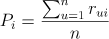


In [19]:
sum_of_rnks = data.groupby('item_id').sum()[['rating']]
sum_of_rnks.head(3)

,rating
item_id,
1,1753
2,420
3,273


In [20]:
film_info['n'] = num_of_rnks['user_id']
film_info['r'] = sum_of_rnks['rating']

In [21]:
film_info.head()

,n,r
item_id,,
1,452,1753
2,131,420
3,90,273
4,209,742
5,86,284


In [22]:
film_info['p'] = film_info['r']/film_info['n']

3. Количество человек m, оценивших фильм положительно. Оценки 4 и выше считаются положительными.

In [23]:
num_of_good_rnks = data[data['rating']>=4].groupby('item_id').count()[['user_id']]
film_info['m'] = num_of_good_rnks['user_id']

4. Доля людей, оценивших фильм положительно (пункт 3 / пункт 1 или m / n).

In [24]:
film_info['m_in_n'] = film_info['m']/film_info['n']

5. Глобальное среднее по всему датасету. Сумма всех оценок по всем фильмам /Количество всех оценок по всем фильмам.

In [25]:
mu = sum(data['rating'])/data.shape[0]

In [26]:
mu

3.52986

6. Оценку, поправленную на нехватку данных: 
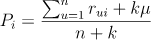

In [27]:
k = 30

In [28]:
film_info['p_new'] = (film_info['r'] + k*mu)/(film_info['n'] + k)

7. Нижнюю и верхнюю границы доверительного интервала оценки (Wilson score interval) из лекции с заданным уровнем доверия.
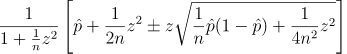

где n — количество рейтингов (пункт 1), p - доля людей, оценивших фильм положительно (пункт 4).



In [29]:
from math import sqrt

In [30]:
def wilson_lower(df):
    n = df[0]
    p = df[1]
    z = 3.291
    k1 = 1/(1+(z**2)/n)
    k2 = (z**2)/(2*n)
    k3 = (p*(1-p))/n
    k4 = (z**2)/(4*(n**2))
    
    lower = k1*(p + k2 - z*sqrt(k3 + k4))

    return lower
    

In [31]:
def wilson_upper(df):
    n = df[0]
    p = df[1]
    z = 3.291
    k1 = 1/(1+(z**2)/n)
    k2 = (z**2)/(2*n)
    k3 = (p*(1-p))/n
    k4 = (z**2)/(4*(n**2))
    
    upper = k1*(p + k2 + z*sqrt(k3 + k4))

    return upper


In [32]:
film_info.head()

,n,r,p,m,m_in_n,p_new
item_id,,,,,,
1,452,1753,3.878319,321.0,0.710177,3.856630
2,131,420,3.206107,51.0,0.389313,3.266434
3,90,273,3.033333,34.0,0.377778,3.157465
4,209,742,3.550239,122.0,0.583732,3.547681
5,86,284,3.302326,39.0,0.453488,3.361171


In [33]:
film_info['lower'] = film_info[['n', 'm_in_n']].apply(wilson_lower, axis=1)

In [34]:
film_info['upper'] = film_info[['n', 'm_in_n']].apply(wilson_upper, axis=1)

In [35]:
film_info.head(10)

,n,r,p,m,m_in_n,p_new,lower,upper
item_id,,,,,,,,
1,452,1753,3.878319,321.0,0.710177,3.856630,0.635683,0.774834
2,131,420,3.206107,51.0,0.389313,3.266434,0.262759,0.532772
3,90,273,3.033333,34.0,0.377778,3.157465,0.231465,0.550347
4,209,742,3.550239,122.0,0.583732,3.547681,0.470114,0.689099
5,86,284,3.302326,39.0,0.453488,3.361171,0.292113,0.625268
6,26,93,3.576923,15.0,0.576923,3.551711,0.285438,0.823167
7,392,1489,3.798469,263.0,0.670918,3.779374,0.589139,0.743506
8,219,875,3.995434,155.0,0.707763,3.939341,0.598761,0.797183
9,299,1165,3.896321,211.0,0.705686,3.862905,0.612985,0.784006


In [36]:
top10_rates = list(film_info.sort_values('n', ascending=False).index[:10])
top10_rates

[50, 258, 100, 181, 294, 286, 288, 1, 300, 121]

In [37]:
top10_average = list(film_info.sort_values('p', ascending=False).index[:10])
top10_average

[814, 1599, 1201, 1122, 1653, 1293, 1500, 1189, 1536, 1467]

In [38]:
top10_rating = list(film_info.sort_values('p_new', ascending=False).index[:10])
top10_rating

[318, 64, 483, 50, 12, 408, 603, 169, 98, 127]

In [39]:
top10_lower = list(film_info.sort_values('lower', ascending=False).index[:10])
top10_lower

[64, 98, 318, 479, 50, 483, 603, 427, 357, 12]

{  
   "top10_rates": [  
      13456,
      12378,
      78213,
      ...
   ],
   "top10_average": [  
      13456,
      12378,
      78213,
      ...
   ],
   "top10_rating": [  
      13456,
      12378,
      78213,
      ...
   ],
   "top10_lower": [  
      13456,
      12378,
      78213,
      ...
   ]
}

In [40]:
fin_json = { "top10_rates": top10_rates,
             "top10_average": top10_average,
             "top10_rating": top10_rating,
             "top10_lower": top10_lower}

In [41]:
fin_json

{'top10_rates': [50, 258, 100, 181, 294, 286, 288, 1, 300, 121],
 'top10_average': [814, 1599, 1201, 1122, 1653, 1293, 1500, 1189, 1536, 1467],
 'top10_rating': [318, 64, 483, 50, 12, 408, 603, 169, 98, 127],
 'top10_lower': [64, 98, 318, 479, 50, 483, 603, 427, 357, 12]}

In [42]:
import json
with open('lab06s.json', 'w') as outfile:
    json.dump(fin_json, outfile)